# Loading the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
train_path = "train.csv"
df = pd.read_csv(train_path)

# Display basic info and first few rows
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Visualizing our Titanic Data set

## Dealing and Visualizing Missing values in the data

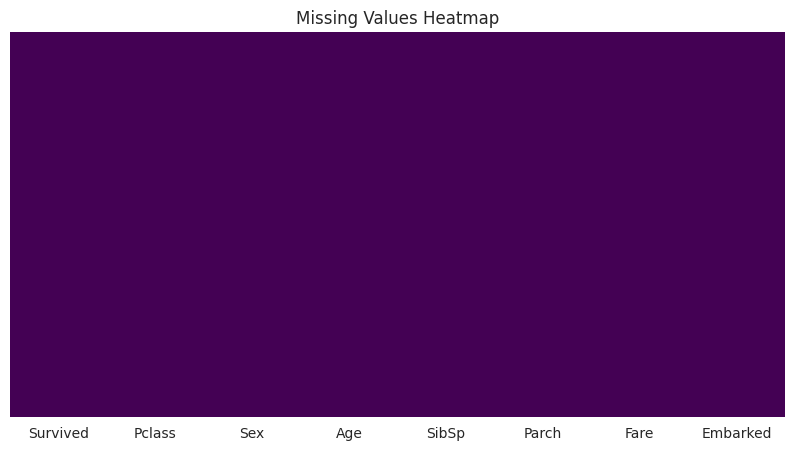

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
# Visualizing missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()
df.isnull().sum()

In [ ]:
# Fill missing Age values with median age
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Embarked values with mode (most frequent value)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop the Cabin column (too many missing values)
df.drop(columns=["Cabin"], inplace=True)

# Verify missing values are handled
df.isnull().sum()


<ipython-input-27-e36915053b0f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
<ipython-input-27-e36915053b0f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

KeyError: "['Cabin'] not found in axis"

## Seeing the correlation in the variables and the final outcome that if the person has survived or not

In [ ]:
# Set plot style
sns.set_style("whitegrid")

# Survival countplot
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=df, palette="coolwarm")
plt.title("Survival Distribution")
plt.xticks([0, 1], ["Not Survived", "Survived"])
plt.show()

# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()

# Fare distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Fare"], bins=30, kde=True, color="green")
plt.title("Fare Distribution")
plt.show()

# Survival by gender
plt.figure(figsize=(6, 4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="coolwarm")
plt.title("Survival by Gender")
plt.show()

# Survival by class
plt.figure(figsize=(6, 4))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="coolwarm")
plt.title("Survival by Class")
plt.show()


## Removing irrelevant features from the data set

In [ ]:
# Convert categorical variables into numerical values
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Drop unnecessary columns
df.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)

# Verify the transformed dataset
df.head()


# Building and training our Neural network

## In order to evaluate our Neural network for performance , we split the training data set into 80:20 , Using Scaling is important when ranges of our features differ largely

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into features (X) and target (y)
X = df.drop(columns=["Survived"])
y = df["Survived"]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 7), (179, 7), (712,), (179,))

## Training the Neural Network

***Our Network architecture:***

Input layer containing 7 features

2 Hidden layers having 16 and 8 nodes in the following layers

Output layer : 1 Node - Corresponding to the probability of whether the person survives or not.

***Training Our Neural Network:***
We train the Weights and bias matrices using Gradient Descent ,to minimize the Binary Cross Entropy , using the Adam Optimizer to speed up the learning Process

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Build the neural network model
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5451 - loss: 0.6864 - val_accuracy: 0.6872 - val_loss: 0.6495
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7171 - loss: 0.6323 - val_accuracy: 0.7598 - val_loss: 0.6047
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7983 - loss: 0.5834 - val_accuracy: 0.7933 - val_loss: 0.5566
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8085 - loss: 0.5234 - val_accuracy: 0.8101 - val_loss: 0.5115
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8338 - loss: 0.4707 - val_accuracy: 0.8212 - val_loss: 0.4822
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8429 - loss: 0.4516 - val_accuracy: 0.8212 - val_loss: 0.4636
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8274 - loss: 0.4364 - val_accuracy: 0.8212 - val_loss: 0.4528
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8060 - loss: 0.4392 - val_accuracy: 0.8101 - val_loss: 0.4492
Epo

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7808 - loss: 0.4611 
Test Accuracy: 0.8101


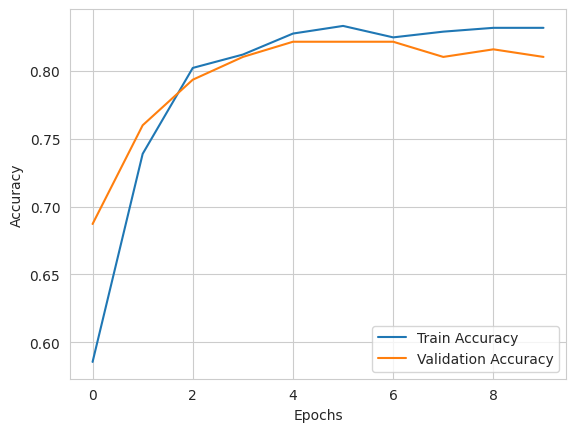

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Overfitting

As we can see in the graph above, running the .fit() model for too many epochs , causes the model to overfit upon the training data, thus we find optimal number of epochs to maximize the validation accuracy

In [ ]:
print("The optimal number of epochs : ",(history.history['val_accuracy']).index(max(history.history['val_accuracy'])))
print("This gives us a validation accuracy of: ",max(history.history['val_accuracy']))

The optimal number of epochs :  10
This gives us a validation accuracy of:  0.8212290406227112


## Evaluating our model on metrics like accuracy,precision,recall,F1 score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary class labels (Threshold = 0.5)
y_pred = (y_pred_probs >= 0.5).astype(int)

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")





6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Accuracy: 0.7933
Precision: 0.7857
Recall: 0.6377
F1 Score: 0.7040


# Testing out our model on a 'test.csv' file , conatainind features of people who we do not know if they have survived or not

In [ ]:

# Load the test dataset
test_df = pd.read_csv("test.csv")

# Save PassengerId for submission
passenger_ids = test_df["PassengerId"]

# Drop unnecessary columns
test_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

# Handle missing values
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)
test_df["Embarked"].fillna(test_df["Embarked"].mode()[0], inplace=True)

# Encode categorical variables
test_df["Sex"] = test_df["Sex"].map({"male": 0, "female": 1})
test_df["Embarked"] = test_df["Embarked"].map({"C": 0, "Q": 1, "S": 2})

# Standardize numerical features (must use the same scaler as training)
scaler = StandardScaler()
test_df[["Age", "Fare"]] = scaler.fit_transform(test_df[["Age", "Fare"]])

# Convert test data to NumPy array
X_final_test = test_df.values

# Load the trained model (ensure you saved it earlier using model.save("model.h5"))
model = load_model("model.h5")

# Predict survival probabilities
test_pred_probs = model.predict(X_final_test)

# Convert probabilities to binary class labels (Threshold = 0.5)
test_predictions = (test_pred_probs >= 0.5).astype(int)

# Create submission DataFrame
submission_df = pd.DataFrame({"PassengerId": passenger_ids, "Survived": test_predictions.flatten()})

# Save to CSV file
submission_df.to_csv("submission.csv", index=False)

print("Predictions saved to submission.csv")
